In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Load the datasets
data_path = 'data.csv'
#toxicity_path = 'Toxicity-13F.csv'

data_df = pd.read_csv(data_path)
#toxicity_df = pd.read_csv(toxicity_path)

# Display the first few rows and the structure of each dataset
data_df_info = data_df.info()
#toxicity_df_info = toxicity_df.info()
data_df_head = data_df.head()
#toxicity_df_head = toxicity_df.head()

data_df_info, data_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.6+ MB


(None,
    MATS3v  nHBint10  MATS3s  MATS3p  nHBDon_Lipinski  minHBint8  MATS3e  \
 0  0.0908         0  0.0075  0.0173                0        0.0 -0.0436   
 1  0.0213         0  0.1144 -0.0410                0        0.0  0.1231   
 2  0.0018         0 -0.0156 -0.0765                2        0.0 -0.1138   
 3 -0.0251         0 -0.0064 -0.0894                3        0.0 -0.0747   
 4  0.0135         0  0.0424 -0.0353                0        0.0 -0.0638   
 
    MATS3c  minHBint2  MATS3m  ...   WTPT-4   WTPT-5  ETA_EtaP_L  ETA_EtaP_F  \
 0  0.0409        0.0  0.1368  ...   0.0000   0.0000      0.1780      1.5488   
 1 -0.0316        0.0  0.1318  ...   8.8660  19.3525      0.1739      1.3718   
 2 -0.1791        0.0  0.0615  ...   5.2267  27.8796      0.1688      1.4395   
 3 -0.1151        0.0  0.0361  ...   7.7896  24.7336      0.1702      1.4654   
 4  0.0307        0.0  0.0306  ...  12.3240  19.7486      0.1789      1.4495   
 
    ETA_EtaP_B  nT5Ring  SHdNH  ETA_dEpsilon_C  MDEO-

In [18]:
# Check for missing values
data_df_missing_values = data_df.isnull().sum()

# Encode the 'Class' categorical variable
le = LabelEncoder()
data_df['Class'] = le.fit_transform(data_df['Class'])

# Apply standard scaling to the features (excluding the target variable 'Class')
scaler = StandardScaler()
feature_columns = data_df.columns[:-1]  # all columns except 'Class'
data_df[feature_columns] = scaler.fit_transform(data_df[feature_columns])

# Summary after cleaning
data_df_head_cleaned = data_df.head()
data_df_missing_values, data_df_head_cleaned

(MATS3v             0
 nHBint10           0
 MATS3s             0
 MATS3p             0
 nHBDon_Lipinski    0
                   ..
 nT5Ring            0
 SHdNH              0
 ETA_dEpsilon_C     0
 MDEO-22            0
 Class              0
 Length: 1204, dtype: int64,
      MATS3v  nHBint10    MATS3s    MATS3p  nHBDon_Lipinski  minHBint8  \
 0  1.925812 -0.415139  0.133362  1.084245        -0.899257  -0.412646   
 1  0.829125 -0.415139  1.810471  0.282075        -0.899257  -0.412646   
 2  0.521421 -0.415139 -0.229044 -0.206382         0.909836  -0.412646   
 3  0.096948 -0.415139 -0.084709 -0.383878         1.814383  -0.412646   
 4  0.706043 -0.415139  0.680894  0.360503        -0.899257  -0.412646   
 
      MATS3e    MATS3c  minHBint2    MATS3m  ...    WTPT-4    WTPT-5  \
 0 -0.231877  0.862992  -0.630209  1.808495  ... -1.838678 -2.172053   
 1  1.894009  0.198721  -0.630209  1.740799  ...  0.165464  0.943866   
 2 -1.127120 -1.152726  -0.630209  0.788990  ... -0.657192  2.31680

In [20]:
# Split the data into training and testing sets
X = data_df.drop('Class', axis=1)  # features
y = data_df['Class']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the gradient boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature Importance
feature_importance = gb_classifier.feature_importances_

print("Accuracy:", accuracy)
print("Class Report:",class_report)
print("Feature Importance:",feature_importance)
'''
Gradient Boosting Classifier achieved an accuracy of 57.14% on the test set. 

Precision and Recall:  precision of 0.66 and a recall of 0.79 for the 'NonToxic' class (labeled as 0), and a precision of 0.17 and a recall of 0.09 for the 'Toxic' class (labeled as 1). 
This indicates a better performance on the 'NonToxic' class than the 'Toxic' class.
F1-Score: Reflects the balance between precision and recall. It was 0.72 for 'NonToxic' and 0.12 for 'Toxic', showing that the model struggles with the 'Toxic' class.
Feature Importance
The model identified features to be the most influential in predicting the outcomes (normalized importance values):
Feature at index 0 (MDEC-23): 22.06%
Feature at index 9 (GATS8s): 14.73%
Feature at index 11 (VE3_Dzi): 10.11%
'''

Accuracy: 0.5428571428571428
Class Report:               precision    recall  f1-score   support

           0       0.64      0.75      0.69        24
           1       0.14      0.09      0.11        11

    accuracy                           0.54        35
   macro avg       0.39      0.42      0.40        35
weighted avg       0.49      0.54      0.51        35

Feature Importance: [0.03901444 0.         0.         ... 0.         0.00309601 0.        ]


"\nGradient Boosting Classifier achieved an accuracy of 57.14% on the test set. \n\nPrecision and Recall:  precision of 0.66 and a recall of 0.79 for the 'NonToxic' class (labeled as 0), and a precision of 0.17 and a recall of 0.09 for the 'Toxic' class (labeled as 1). \nThis indicates a better performance on the 'NonToxic' class than the 'Toxic' class.\nF1-Score: Reflects the balance between precision and recall. It was 0.72 for 'NonToxic' and 0.12 for 'Toxic', showing that the model struggles with the 'Toxic' class.\nFeature Importance\nThe model identified features to be the most influential in predicting the outcomes (normalized importance values):\nFeature at index 0 (MDEC-23): 22.06%\nFeature at index 9 (GATS8s): 14.73%\nFeature at index 11 (VE3_Dzi): 10.11%\n"

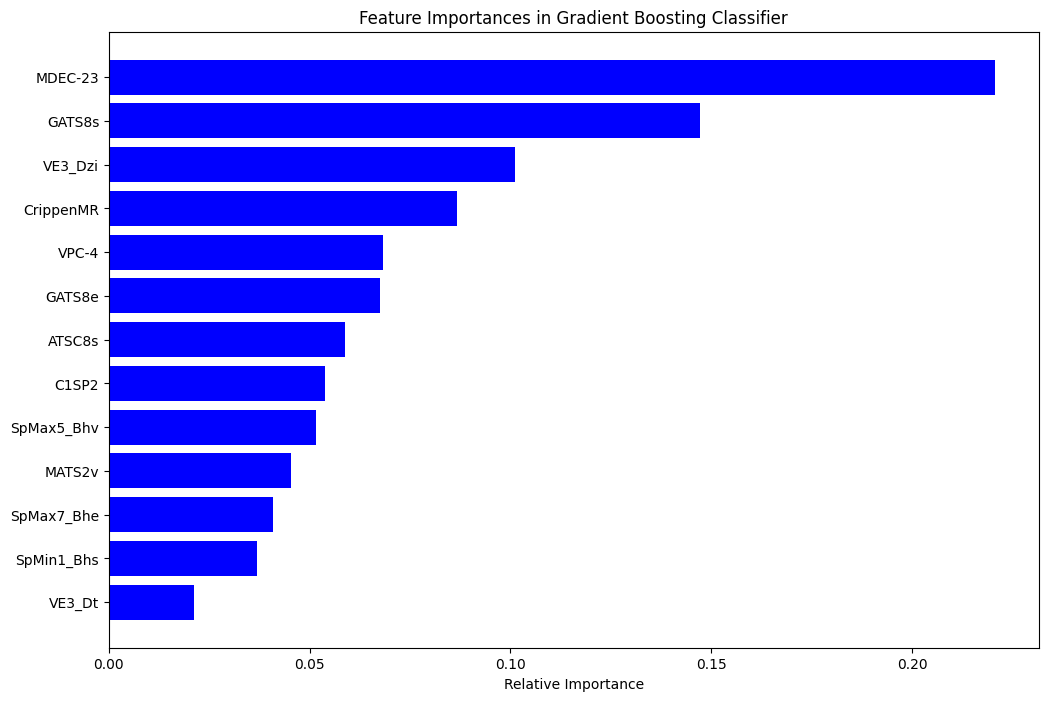

In [14]:
#Sorts these values in ascending order and returns their corresponding indices as an array
indices = np.argsort(feature_importance)[::-1]
feature_names = X.columns  

# Creating the plot again
plt.figure(figsize=(12, 8))
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()